In [55]:
import pandas as pd
import requests

In [59]:
url1 = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217423&type=222"
url2 = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217442&type=222"
def parser(url):
  response = requests.get(url)
  uik = pd.read_html(url, encoding='cp1251', header = 0)[7]
  uik.drop([1],inplace = True)
  for i in range(uik.shape[1]): 
    uik.iloc[1,i] = int(uik.iloc[1,i]) + int(uik.iloc[2,i]) 
    for j in range(3):
      uik.iloc[(11+j),i] = (uik.iloc[(11+j),i]).split()[1] 
  uik.drop([int(k) for k in range(3,12)], inplace = True)
  return(uik)
    
uik5 = parser(url1)
uik24 = parser(url2)

print(uik5)
print(uik24)




   УИК №1422 УИК №1423 УИК №1424 УИК №1425 УИК №1426 УИК №1427 УИК №1428  \
0       1797      1945      1814      1934      2037      1921      2433   
2        484       505       321       417       412       441       743   
12    11.78%    11.29%    14.02%    13.91%    14.36%    10.98%    13.50%   
13    69.63%    69.90%    70.09%    68.59%    68.37%    70.02%    66.13%   
14    15.91%    15.25%    14.02%    14.39%    14.60%    15.33%    17.54%   

   УИК №1429 УИК №1430 УИК №1431  ... УИК №1531 УИК №1532 УИК №1533 УИК №1534  \
0       2253      2065      1644  ...      2291      2792      2399      2741   
2        550       556       376  ...       595       699       527       673   
12    13.45%    15.32%    13.30%  ...     4.54%    14.29%    16.32%    16.79%   
13    68.00%    61.62%    68.35%  ...    83.70%    68.25%    46.30%    47.85%   
14    16.73%    18.74%    15.43%  ...     9.24%    14.72%    34.54%    31.35%   

   УИК №1535 УИК №1536 УИК №1537 УИК №1538 УИК №1539 УИК

In [78]:
proc_ap = []
proc_ap1 = []
proc_ap2 = []

c_1=0
c_2=0

for i in range(uik5.shape[1]): 
    proc_ap1.append((int(uik5.iloc[1, i])/(int(uik5.iloc[0,i])))*100)
    c_1=c_1+1

for i in range(uik24.shape[1]):
    proc_ap2.append((int(uik24.iloc[1, i])/(int(uik24.iloc[0,i])))*100)
    c_2=c_2+1
 
proc_ap=proc_ap1+proc_ap2


In [79]:
proc_Amosov = []
proc_Beglov = []
proc_Tikhonova = []
ap = []

for i in range(uik5.shape[1]):
    proc_Amosov.append(float(uik5.iloc[2, i].split("%")[0]))
    proc_Beglov.append(float(uik5.iloc[3, i].split("%")[0]))
    proc_Tikhonova.append(float(uik5.iloc[4, i].split("%")[0]))
    ap.append(int(uik5.iloc[0,i]))
    
for i in range(uik24.shape[1]):
    proc_Amosov.append(float(uik24.iloc[2, i].split("%")[0]))
    proc_Beglov.append(float(uik24.iloc[3, i].split("%")[0]))
    proc_Tikhonova.append(float(uik24.iloc[4, i].split("%")[0]))
    ap.append(int(uik24.iloc[0,i]))


In [81]:
import math
sr_ap = 0.0
ks = 0
k=c_1+c_2
for i in range (k):
    ks = ks+1
    sr_ap = sr_ap + proc_ap[i]
sr_ap =sr_ap/ks

summa = 0.0
for i in range (k):
    summa = summa + (proc_ap[i] - sr_ap)*(proc_ap[i] - sr_ap)
d = math.sqrt(summa/(k))

vybros = []
vybros_Amosov = []
vybros_Beglov = []
vybros_Tikhonova = []

print('Выбросы значений явки: ')
for i in range (k):    
    if not ((sr_ap - 2*d)<=(proc_ap[i])<=(sr_ap + 2*d)):      
            print(round(proc_ap[i],2),'%') 
            print('За Амосова',proc_Amosov[i],'%')
            print('За Беглова',proc_Beglov[i],'%') 
            print('За Тихонову',proc_Tikhonova[i],'%')
            print('********************')


Выбросы значений явки: 
92.43 %
За Амосова 8.32 %
За Беглова 76.13 %
За Тихонову 9.96 %
********************
98.43 %
За Амосова 6.67 %
За Беглова 84.16 %
За Тихонову 8.86 %
********************
98.38 %
За Амосова 7.48 %
За Беглова 75.0 %
За Тихонову 15.78 %
********************
91.53 %
За Амосова 15.61 %
За Беглова 66.47 %
За Тихонову 17.92 %
********************
68.43 %
За Амосова 13.8 %
За Беглова 71.72 %
За Тихонову 12.79 %
********************
80.29 %
За Амосова 8.64 %
За Беглова 76.36 %
За Тихонову 14.55 %
********************
84.04 %
За Амосова 15.19 %
За Беглова 72.78 %
За Тихонову 7.59 %
********************
72.88 %
За Амосова 5.81 %
За Беглова 76.74 %
За Тихонову 12.79 %
********************
77.04 %
За Амосова 13.25 %
За Беглова 77.48 %
За Тихонову 7.28 %
********************
69.08 %
За Амосова 9.52 %
За Беглова 68.57 %
За Тихонову 20.0 %
********************


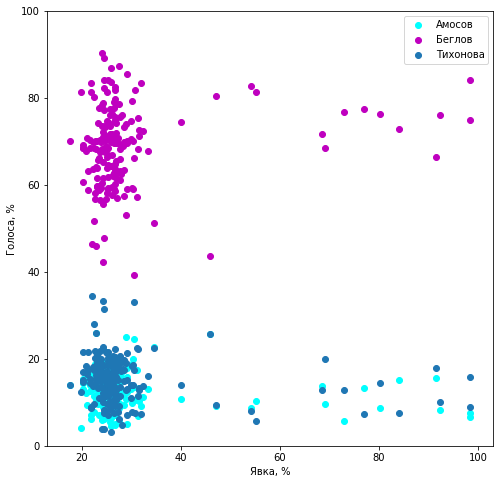

In [82]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(proc_ap, proc_Amosov, label = 'Амосов', color = 'aqua')
plt.scatter(proc_ap, proc_Beglov, label = 'Беглов', color = 'm')
plt.scatter(proc_ap, proc_Tikhonova, label = 'Тихонова')
plt.xlabel(u'Явка, %')
plt.ylabel(u'Голоса, %')
plt.ylim(0, 100)
plt.legend()
plt.show()

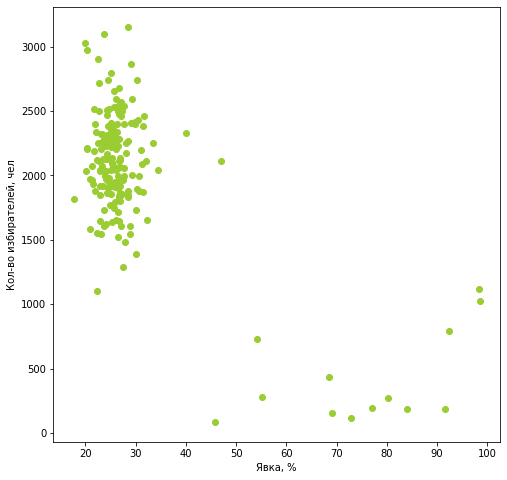

In [83]:
plt.figure(figsize=(8,8))
plt.scatter(procent_appearence,appearence, color = 'yellowgreen')
plt.ylabel(u'Кол-во избирателей, чел')
plt.xlabel(u'Явка, %')
plt.show()

In [87]:
import numpy as np
c = np.array([])
for i in range(101):
  c = np.append(c, 0)
for i in proc_ap:
    for j in range(101):
        if (((j - 0.5) < i) & (i <= (j + 0.5))):
            c[j] = c[j]+1

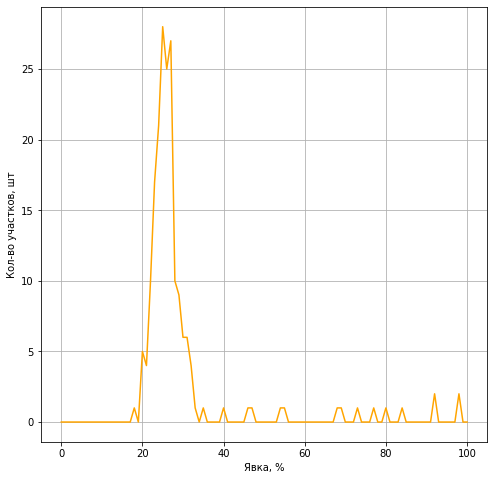

In [89]:
plt.figure(figsize=(8,8))
x = np.arange(101)
plt.plot(x, c, color = 'orange')
plt.ylabel(u'Кол-во участков, шт')
plt.xlabel(u'Явка, %')
plt.grid()
plt.show()